In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from pathlib import Path
import os
import sys
import bz2
import pickle
np.random.seed(10)
# adds the visibility of the mlem module, needed to load the attack models
sys.path.append("../../../") 
import mlem

In [2]:
import warnings

Loading the bb and data (Clustering without target division, K=6, With noise in the dataset)

In [3]:
BLACK_BOX_PATH = './diva_outputs_26_feat_stdscal/diva_randfor_stdscaled.bz2'
EXPERIMENTS_RESULTS_FOLDER = "/home/gerardozinno/Desktop/diva_featureselect_std/gaussian/same"
BLACK_BOX_DATA_PATH = './diva_outputs_26_feat_stdscal/diva_stdscaled_randfor_data.npz'
TRAIN_SET_CSV = 'diva_outputs_26_feat_stdscal/diva_std_train_set.csv'
TEST_SET_CSV  = 'diva_outputs_26_feat_stdscal/diva_std_test_set.csv'
NOISY_VALIDATION_SET_CSV = 'diva_outputs_26_feat_stdscal/diva_std_validation-noisy.csv'
CENTROIDS_NEIGHBORS = 'diva_outputs_26_feat_stdscal/diva_centroids_neighbors.csv'

In [4]:
def get_attack_mod(index:int, targets=[0,1], base_folder=EXPERIMENTS_RESULTS_FOLDER):
    """
    Args:
        index - row of the dataset on which the attack model was built
        targets (int | List(int)) - targets for the attack model.
    Returns:
        List containing the attack models (or model) for that particular index
    """
    if type(targets) is int:
        targets = [targets]
    loaded_models = []
    for t in targets:
        path = f"{base_folder}/{index}/attack/{t}/model.pkl.bz2"
        with bz2.BZ2File(path) as f:
            data = pickle.load(f)
            loaded_models.append(data)
    return loaded_models
        
def get_local_model(index:int, base_folder=EXPERIMENTS_RESULTS_FOLDER):
    """
    Args:
        index - row of the dataset on which the local model was built.
    Returns:
        Local model
    """
    path = f"{base_folder}/{index}/black_box"
    local_model_path = f"{path}/model.pkl.bz2"
    with bz2.BZ2File(local_model_path) as lm:
        local_model = pickle.load(lm)
    return local_model

def get_local_model_data(index: int, base_folder=EXPERIMENTS_RESULTS_FOLDER):
    """
    Args:
        index - row of the dataset on which the local model was built.
    Returns:
        Structure with keys x and y
    """
    path = f"{base_folder}/{index}/black_box"
    data_path = f"{path}/data.npz"
    loaded = np.load(data_path, allow_pickle=True)
    return loaded

#def get_subset_target_cluster(df, target, cluster):
#    """
#    Returns the subset of a dataframe with the specified target and cluster.
#    """
#    tmp = df[df['Target'] == target]
#    return tmp[tmp['Cluster'] == cluster]

def get_subset_cluster(df, cluster):
    """
    Returns the subset of a dataframe with the specified Cluster.
    """
    return df[df['Cluster'] == cluster]

def split_probs_array(arr):
    """
    
    """
    n_classes = len(arr[0])
    separated = []
    max_index_row = np.argmax(arr, axis=1)
    for c in range(n_classes):
        separated.append(arr[max_index_row == c])
    return separated

loading the data and the black box

In [5]:
with bz2.BZ2File(BLACK_BOX_PATH) as f:
    black_box = pickle.load(f)

In [6]:
loaded = np.load(BLACK_BOX_DATA_PATH, allow_pickle=True)
for k in loaded.keys():
    print(k, end=" ")

X_train y_train X_test y_test X_centroids_neighbors y_centroids_neighbors centroids 

In [7]:
x_train = loaded["X_train"]
x_test = loaded["X_test"]
y_train = loaded["y_train"]
y_test = loaded["y_test"]
x_test_clustered = loaded["X_centroids_neighbors"]
y_test_clustered = loaded["y_centroids_neighbors"]

doing some integrity checks

In [19]:
feat_cols = ['FLG_PRES_RISCOSS',
 'IMP_V_AGG_IVA',
 'SOLVIBILITA',
 'VOL_AFF_DICH',
 'PESO_ADESIONE',
 'TIPO_DICH_ACCERT',
 'IMP_ESISTZ',
 'DETR_IVA_ACC',
 'VAL_ALIQ_MEDIA_ACQ',
 'FLG_PRES_RICORSO',
 'STATO_CONTROLLO',
 'VAL_ALIQ_M_ACQ_IMP',
 'FLG_VC',
 'IMP_V_AGG_IMPON',
 'VAR_RIMBORSO',
 'VAL_ALIQ_MEDIA_VOL',
 'IMP_IMPST_CREDIT',
 'IMP_ACQ_NOIMP',
 'COD_ATTIV_GEN',
 'IVA_OP_IMPON_DIC',
 'IMP_BEN_AMM',
 'IMP_ECC_PREC',
 'FLG_PRES_BILANCIO',
 'imp_tot_pos',
 'VAR_DETRAZIONE',
 'MAG_IMP_RIT_ACC']

In [23]:
from sklearn.metrics import classification_report, ConfusionMatrixDisplay

In [21]:
diva_train = pd.read_csv(TRAIN_SET_CSV)
diva_test = pd.read_csv(TEST_SET_CSV)
diva_test_subset_cluster = pd.read_csv(CENTROIDS_NEIGHBORS)

In [27]:
BASE_RESULTS_PATH = Path("DIVA_ANALYSIS_RESULTS_NO_TARGET_DIVISION_WITH_NOISE")
BASE_RESULTS_PATH.mkdir(exist_ok=False)

ind=0 clus=0 DIVA_ANALYSIS_RESULTS_NO_TARGET_DIVISION_WITH_NOISE/00_c0
ind=1 clus=0 DIVA_ANALYSIS_RESULTS_NO_TARGET_DIVISION_WITH_NOISE/01_c0
ind=2 clus=0 DIVA_ANALYSIS_RESULTS_NO_TARGET_DIVISION_WITH_NOISE/02_c0
ind=3 clus=0 DIVA_ANALYSIS_RESULTS_NO_TARGET_DIVISION_WITH_NOISE/03_c0
ind=4 clus=0 DIVA_ANALYSIS_RESULTS_NO_TARGET_DIVISION_WITH_NOISE/04_c0
ind=5 clus=0 DIVA_ANALYSIS_RESULTS_NO_TARGET_DIVISION_WITH_NOISE/05_c0
ind=6 clus=0 DIVA_ANALYSIS_RESULTS_NO_TARGET_DIVISION_WITH_NOISE/06_c0
ind=7 clus=0 DIVA_ANALYSIS_RESULTS_NO_TARGET_DIVISION_WITH_NOISE/07_c0
ind=8 clus=0 DIVA_ANALYSIS_RESULTS_NO_TARGET_DIVISION_WITH_NOISE/08_c0
ind=9 clus=0 DIVA_ANALYSIS_RESULTS_NO_TARGET_DIVISION_WITH_NOISE/09_c0
ind=10 clus=0 DIVA_ANALYSIS_RESULTS_NO_TARGET_DIVISION_WITH_NOISE/10_c0
ind=11 clus=0 DIVA_ANALYSIS_RESULTS_NO_TARGET_DIVISION_WITH_NOISE/11_c0
ind=12 clus=0 DIVA_ANALYSIS_RESULTS_NO_TARGET_DIVISION_WITH_NOISE/12_c0
ind=13 clus=0 DIVA_ANALYSIS_RESULTS_NO_TARGET_DIVISION_WITH_NOISE/13_c0
in

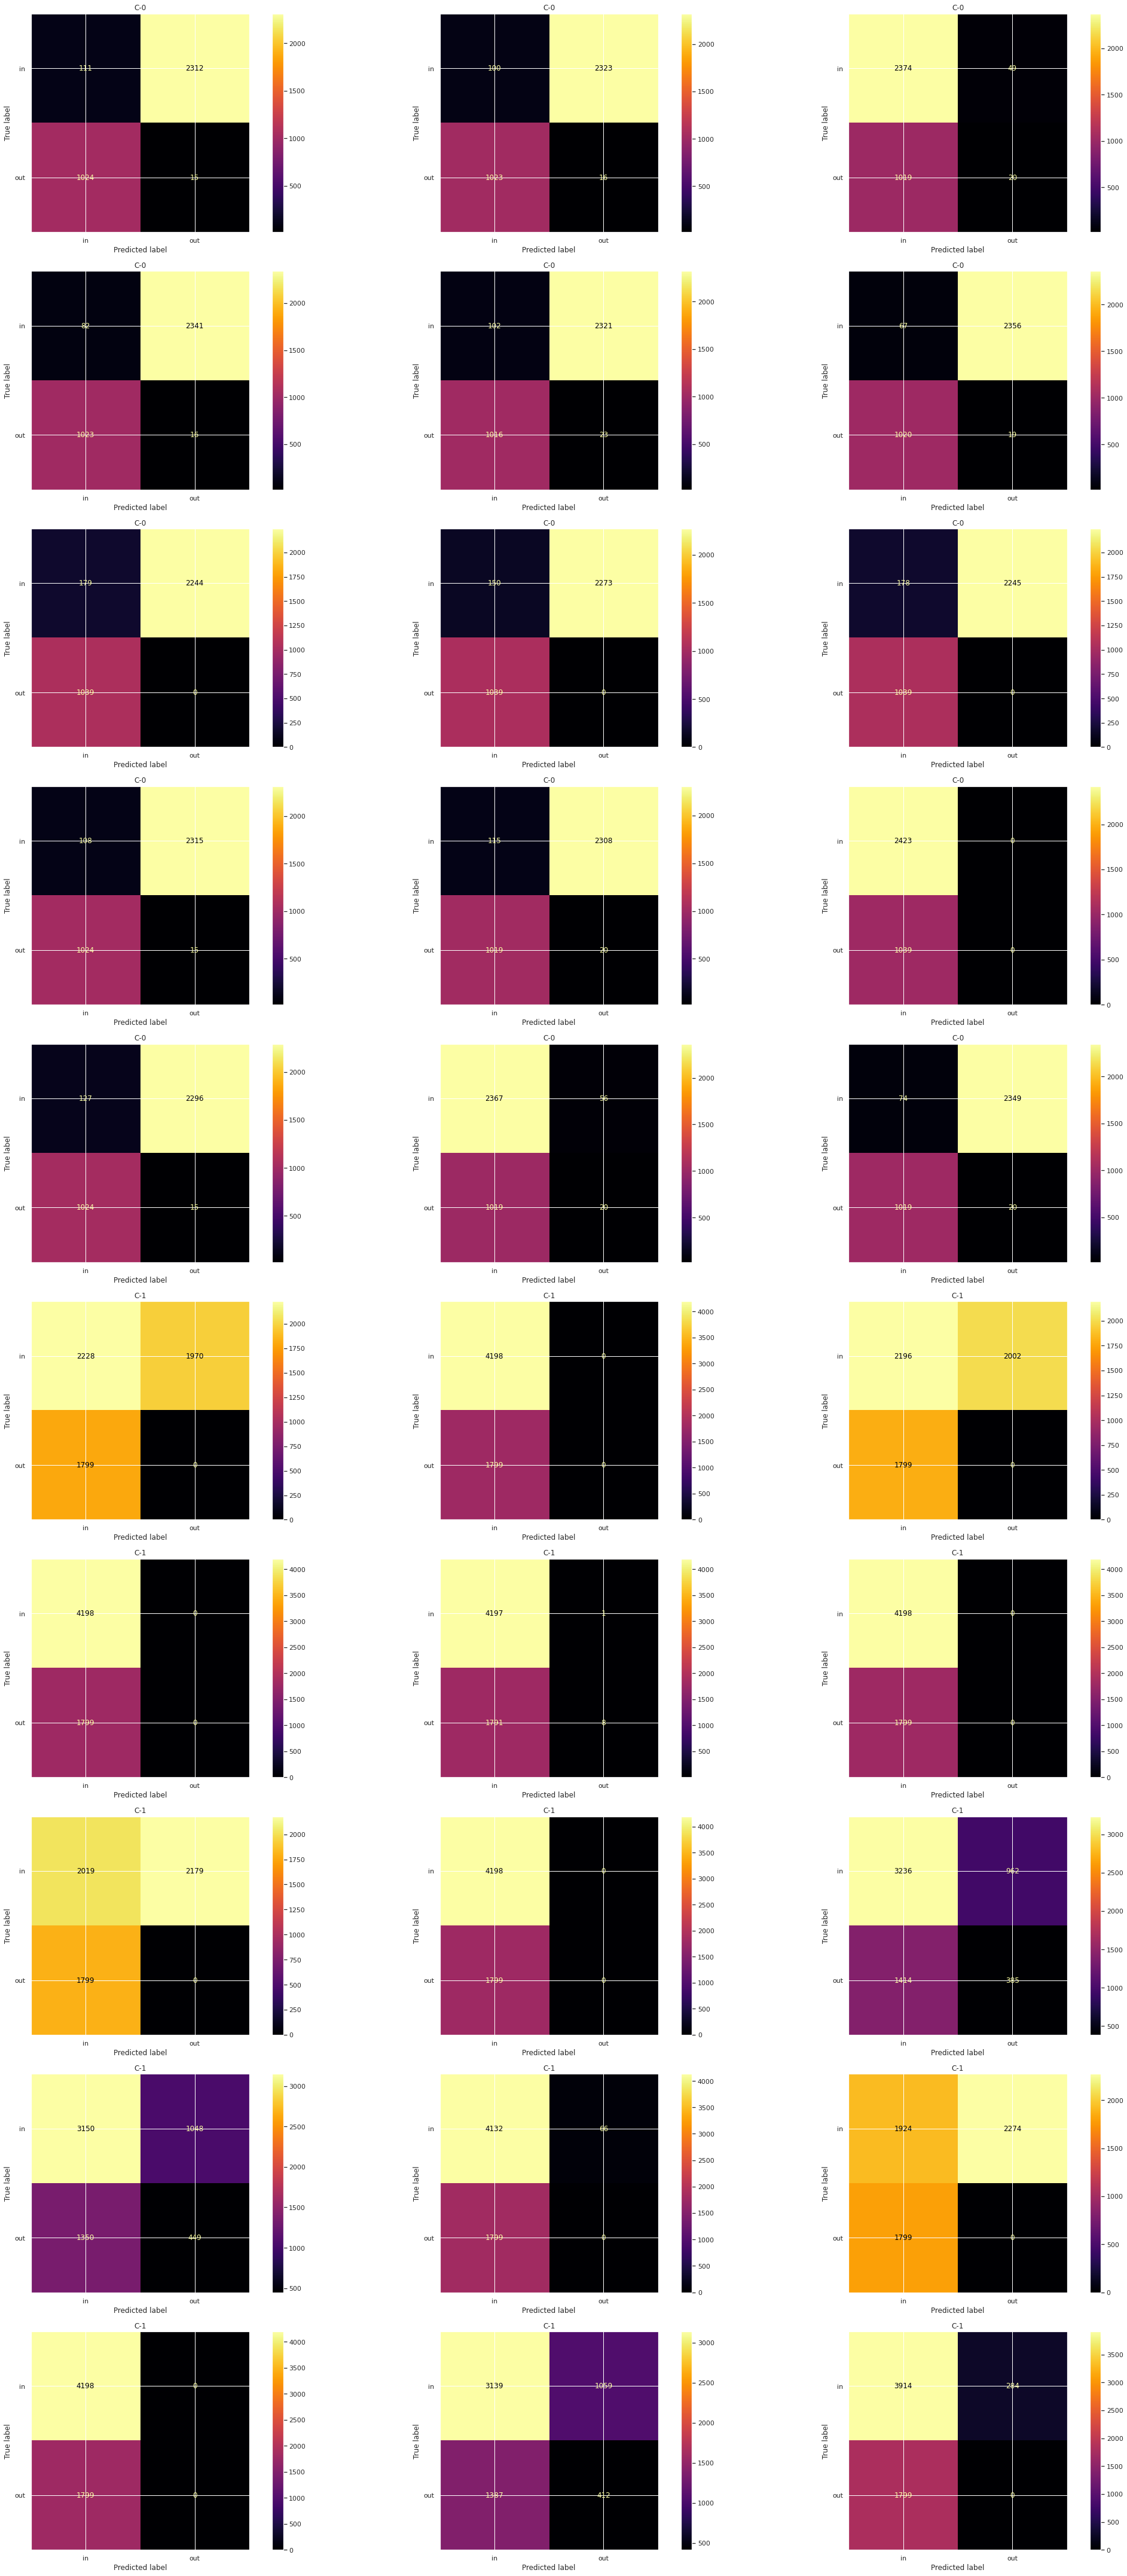

In [30]:
# NUOVA
fig, axs = plt.subplots(nrows=10, ncols=3, figsize=(30, 60))
axs_list = axs.ravel()

with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    # for each (target, cluster)...
    for ind, clus in enumerate(diva_test_subset_cluster['Cluster'].values):
        ind_res_path = BASE_RESULTS_PATH / f"{ind:02d}_c{clus}"
        ind_res_path.mkdir(exist_ok=True)
        print(f"{ind=} {clus=} {ind_res_path}")
        # retrieve the attack models
        attack_0, attack_1 = get_attack_mod(ind)

        # TRAIN
        train_path = ind_res_path / "train"
        train_path.mkdir(exist_ok="true")
        # get the subset of the training set
        train_subset = get_subset_cluster(diva_train, clus)

        probs_train = black_box.predict_proba(train_subset[feat_cols].to_numpy())
        
        ones_train, zeroes_train = split_probs_array(probs_train)
        
        assert len(zeroes_train) + len(ones_train) == len(probs_train)

        if len(zeroes_train) > 0:
            atk_0_train = attack_0.predict(zeroes_train)
            report_0_train = classification_report(["in"]*len(atk_0_train), atk_0_train)
            with open(str(train_path / "0.txt"), "w") as f:
                f.write(report_0_train)

        if len(ones_train) > 0:
            atk_1_train = attack_1.predict(ones_train)
            report_1_train = classification_report(["in"]*len(atk_1_train), atk_1_train)
            with open(str(train_path / "1.txt"), "w") as f:
                f.write(report_1_train)
        
        l0tr = len(zeroes_train)
        l1tr = len(ones_train)
        
        train_results = None
        if l0tr == 0:
            train_results = atk_1_train
        elif l1tr == 0:
            train_results = atk_0_train
        else:
            train_results = np.concatenate((atk_0_train, atk_1_train))
        with open(str(train_path / "01.txt"), "w") as f:
            report_01_train = classification_report(["in"]*len(train_results), train_results)
            f.write(report_01_train)

        

        #TEST
        test_path = ind_res_path / "test"
        test_path.mkdir(exist_ok="true")
        # get test subset of the test set
        test_subset  = get_subset_cluster(diva_test, clus)

        probs_test = black_box.predict_proba(test_subset[feat_cols].to_numpy())
        ones_test, zeroes_test = split_probs_array(probs_test)
        assert len(zeroes_test) + len(ones_test) == len(probs_test)

        if len(zeroes_test) > 0:
            atk_0_test = attack_0.predict(zeroes_test)
            report_0_test = classification_report(["out"] * len(atk_0_test), atk_0_test)
            with open(str(test_path / "0.txt"), "w") as f:
                f.write(report_0_test)

        if len(ones_test) > 0:
            atk_1_test = attack_0.predict(ones_test)
            report_1_test = classification_report(["out"] * len(atk_1_test), atk_1_test)
            with open(str(test_path / "1.txt"), "w") as f:
                f.write(report_1_test)
        
        l0te = len(zeroes_test)
        l1te = len(ones_test)
        test_results = None
        if l0te == 0:
            test_results = atk_1_test
        elif l1te == 0:
            test_results = atk_0_test
        else:
            test_results = np.concatenate((atk_0_test, atk_1_test))
            
        with open(str(test_path / "01.txt"), "w") as f:
            report_01_train = classification_report(["out"]*len(test_results), test_results)
            f.write(report_01_train)
        
        # Concatenating test and train
        with open(str(ind_res_path / "traintest_full.txt"), "w") as f:
            full = np.concatenate((train_results, test_results))
            mask = ["in"] * len(train_results) + ["out"] * len(test_results)
            f.write(classification_report(mask, full))
            aa = axs_list[ind]
            ConfusionMatrixDisplay.from_predictions(mask, full, ax=aa, cmap='inferno')
            aa.set_title(f"C-{clus}")
            
plt.tight_layout()

# Using a Voting classifier

Classifier which implements the hard voting, it returns arrays containing "in" / "out" / "even" (this last case is possible only if there was an even number of classifiers)

In [31]:
from typing import List
class HardVotingClassifier:
    def __init__(self, classifiers: List):
        self.classifiers_ = classifiers
        self.nclass = len(classifiers)
        assert all([x.classes_ == self.classifiers_[0].classes_] for x in self.classifiers_)
    def predict(self, x):
        """
        Returns: array with classification, containing ["in", "out", "even"]
        """
        # use 1 for "in", -1 for "out", sum all the arrays and replace the values => 0 with in
        # the ones < 0 with out, return a boolean mask to indicate the ones where there was a 50/50
        # decision (only for when the number of classifiers is even)
        def convert_to_number(x):
            if x == "in":
                return 1
            elif x == "out":
                return -1
            else:
                raise ValueError(f"invalid argument {x}")
        def convert_to_inout(x):
            if x > 0:
                return "in"
            elif x < 0:
                return "out"
            else:
                return "even"
        
                
        convert_to_number_vectorized = np.vectorize(convert_to_number)
        convert_to_inout_vectorized  = np.vectorize(convert_to_inout)    
        
        predictions = [convert_to_number_vectorized(model.predict(x)) for model in self.classifiers_]
        
        return convert_to_inout_vectorized(sum(predictions))

In [32]:
BASE_VOTING_PATH = Path(BASE_RESULTS_PATH) / "HARD_VOTING"
BASE_VOTING_PATH.mkdir(exist_ok=False)
print(BASE_VOTING_PATH)

DIVA_ANALYSIS_RESULTS_NO_TARGET_DIVISION_WITH_NOISE/HARD_VOTING


In [33]:
ATTACK_0, ATTACK_1 = [], []

for index in range(len(x_test_clustered)):
    atk0, atk1 = get_attack_mod(index)
    ATTACK_0.append(atk0)
    ATTACK_1.append(atk1)
assert (len(ATTACK_0) == len(ATTACK_1)) and (len(ATTACK_0) == len(x_test_clustered))
        
ensemble_0 = HardVotingClassifier(classifiers=ATTACK_0)
ensemble_1 = HardVotingClassifier(classifiers=ATTACK_1)

/home/gerardozinno/.pyenv/versions/3.9.9/envs/ml-environment/lib/python3.9/site-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.0.2 when using version 1.1.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/gerardozinno/.pyenv/versions/3.9.9/envs/ml-environment/lib/python3.9/site-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator RandomForestClassifier from version 1.0.2 when using version 1.1.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


In [34]:
TRAIN = diva_train[feat_cols]
TEST = diva_test[feat_cols]

In [35]:
TRAIN_PREDICTIONS = black_box.predict_proba(TRAIN.to_numpy())
TEST_PREDICTIONS  = black_box.predict_proba(TEST.to_numpy())

Now I let the ensemble_0 evaluate the train / test predictions belonging to class 0. Then I do the same for ensemble 1.

In [36]:
TRAIN_PREDICTIONS_0 = TRAIN_PREDICTIONS[diva_train['Target'] == 0]
TRAIN_PREDICTIONS_1 = TRAIN_PREDICTIONS[diva_train['Target'] == 1]
TEST_PREDICTIONS_0 = TEST_PREDICTIONS[diva_test['Target'] == 0]
TEST_PREDICTIONS_1 = TEST_PREDICTIONS[diva_test['Target'] == 1]

In [37]:
IN_0 = ensemble_0.predict(TRAIN_PREDICTIONS_0)
IN_1 = ensemble_1.predict(TRAIN_PREDICTIONS_1)
OUT_0 = ensemble_0.predict(TEST_PREDICTIONS_0)
OUT_1 = ensemble_1.predict(TEST_PREDICTIONS_1)

In [38]:
IN_0

array(['in', 'in', 'in', ..., 'in', 'in', 'in'], dtype='<U2')

In [39]:
IN_1

array(['in', 'in', 'in', ..., 'in', 'in', 'in'], dtype='<U4')

In [40]:
OUT_0

array(['in', 'in', 'in', ..., 'in', 'in', 'in'], dtype='<U2')

In [41]:
OUT_1

array(['in', 'in', 'in', 'in', 'in', 'in', 'in', 'in', 'in', 'in', 'in',
       'in', 'in', 'in', 'in', 'in', 'in', 'in', 'in', 'in', 'in', 'in',
       'in', 'in', 'in', 'in', 'in', 'in', 'in', 'in', 'in', 'in', 'in',
       'in', 'in', 'in', 'in', 'in', 'in', 'out', 'in', 'in', 'in', 'in',
       'in', 'in', 'in', 'in', 'in', 'in', 'in', 'in', 'in', 'in', 'in',
       'in', 'in', 'in', 'in', 'in', 'in', 'in', 'in', 'in', 'in', 'in',
       'out', 'out', 'in', 'in', 'in', 'in', 'in', 'in', 'in', 'in', 'in',
       'in', 'in', 'in', 'in', 'out', 'in', 'out', 'in', 'in', 'even',
       'in', 'in', 'in', 'in', 'in', 'in', 'in', 'in', 'in', 'out', 'in',
       'in', 'in', 'in', 'in', 'in', 'in', 'out', 'in', 'in', 'in', 'in',
       'in', 'in', 'in', 'in', 'in', 'in', 'in', 'in', 'in', 'in', 'in',
       'in', 'in', 'in', 'in', 'in', 'in', 'in', 'in', 'out', 'in', 'in',
       'in', 'even', 'in', 'in', 'in', 'in', 'in', 'in', 'in', 'in', 'in',
       'in', 'in', 'in', 'in', 'in', 'in', 'i

↑ no good, it's saying always in

In [42]:
INS = np.concatenate([IN_0, IN_1])
OUTS = np.concatenate([OUT_0, OUT_1])

In [43]:
number_outs = [x for x in OUTS if x == "out"]
number_even = [x for x in OUTS if x == "even"]
print(f"{len(number_outs)/len(OUTS)=}")
print(f"{len(number_even)/len(OUTS)=}")

len(number_outs)/len(OUTS)=0.017618040873854827
len(number_even)/len(OUTS)=0.0028188865398167725


In [44]:
INS_MASK = ['in'] * len(INS)
OUTS_MASK = ['out'] * len(OUTS)
INOUTS = np.concatenate([INS, OUTS])
EVEN_MASK = INOUTS != "even" # to mask away the even value

In [45]:
print(classification_report(np.array(INS_MASK + OUTS_MASK)[EVEN_MASK], INOUTS[EVEN_MASK]))

              precision    recall  f1-score   support

          in       0.70      1.00      0.82      6614
         out       0.60      0.02      0.03      2830

    accuracy                           0.70      9444
   macro avg       0.65      0.51      0.43      9444
weighted avg       0.67      0.70      0.59      9444



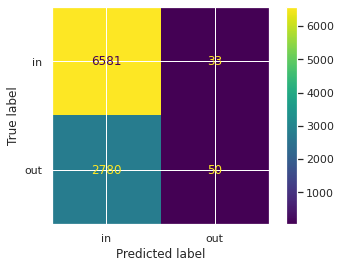

In [46]:
ConfusionMatrixDisplay.from_predictions(np.array(INS_MASK + OUTS_MASK)[EVEN_MASK], INOUTS[EVEN_MASK])

In [48]:
TRAIN_PREDICTIONS_0_BB, TRAIN_PREDICTIONS_1_BB = split_probs_array(TRAIN_PREDICTIONS)
TEST_PREDICTIONS_0_BB, TEST_REDICTIONS_1_BB = split_probs_array(TEST_PREDICTIONS)

In [49]:
IN_0 = ensemble_0.predict(TRAIN_PREDICTIONS_0_BB)
IN_1 = ensemble_1.predict(TRAIN_PREDICTIONS_1_BB)
OUT_0 = ensemble_0.predict(TEST_PREDICTIONS_0_BB)
OUT_1 = ensemble_1.predict(TEST_REDICTIONS_1_BB)

In [50]:
INS = np.concatenate([IN_0, IN_1])
OUTS = np.concatenate([OUT_0, OUT_1])

In [51]:
number_outs = [x for x in OUTS if x == "out"]
number_even = [x for x in OUTS if x == "even"]
print(f"{len(number_outs)/len(OUTS)=}")
print(f"{len(number_even)/len(OUTS)=}")

len(number_outs)/len(OUTS)=0.0
len(number_even)/len(OUTS)=0.0


In [52]:
INS_MASK = ['in'] * len(INS)
OUTS_MASK = ['out'] * len(OUTS)
INOUTS = np.concatenate([INS, OUTS])
EVEN_MASK = INOUTS != "even" # to mask away the even value

In [53]:
print(classification_report(np.array(INS_MASK + OUTS_MASK)[EVEN_MASK], INOUTS[EVEN_MASK]))

              precision    recall  f1-score   support

          in       0.70      1.00      0.82      6621
         out       0.00      0.00      0.00      2838

    accuracy                           0.70      9459
   macro avg       0.35      0.50      0.41      9459
weighted avg       0.49      0.70      0.58      9459



/home/gerardozinno/.pyenv/versions/3.9.9/envs/ml-environment/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/gerardozinno/.pyenv/versions/3.9.9/envs/ml-environment/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/gerardozinno/.pyenv/versions/3.9.9/envs/ml-environment/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` paramete

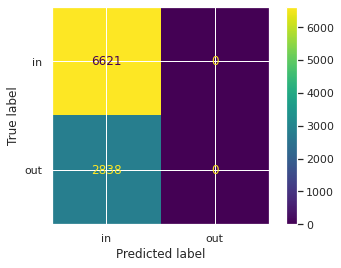

In [54]:
ConfusionMatrixDisplay.from_predictions(np.array(INS_MASK + OUTS_MASK)[EVEN_MASK], INOUTS[EVEN_MASK])